In [1]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses=[]
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np. array(dataset)

Using TensorFlow backend.


In [2]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a5', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:, 0:4]
y_train = dataset[:, 4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [4]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful = True)) # 상태유지(Stateful)
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [5]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs : 0
Epoch 1/1
 - 2s - loss: 2.3482 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 0s - loss: 2.0401 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9632 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9468 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9370 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9303 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9252 - acc: 0.3600
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9210 - acc: 0.3600
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9174 - acc: 0.3600
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9143 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9113 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 0s - loss: 1.9084 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.9053 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 0s - loss: 1.9021 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 0s - loss: 1.8980 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 0s - loss: 1.9076 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 0s - loss: 1.8926 - acc: 0.3600
epochs : 17
Epoch 1/1
 - 0s - loss: 2.026

 - 0s - loss: 1.1155 - acc: 0.5800
epochs : 144
Epoch 1/1
 - 0s - loss: 0.9495 - acc: 0.6200
epochs : 145
Epoch 1/1
 - 0s - loss: 0.6581 - acc: 0.7600
epochs : 146
Epoch 1/1
 - 0s - loss: 0.6075 - acc: 0.8400
epochs : 147
Epoch 1/1
 - 0s - loss: 0.3969 - acc: 0.9200
epochs : 148
Epoch 1/1
 - 0s - loss: 0.3370 - acc: 0.9200
epochs : 149
Epoch 1/1
 - 0s - loss: 0.5401 - acc: 0.8800
epochs : 150
Epoch 1/1
 - 0s - loss: 0.9875 - acc: 0.6400
epochs : 151
Epoch 1/1
 - 0s - loss: 1.2447 - acc: 0.5000
epochs : 152
Epoch 1/1
 - 0s - loss: 1.1607 - acc: 0.6200
epochs : 153
Epoch 1/1
 - 0s - loss: 0.7024 - acc: 0.7600
epochs : 154
Epoch 1/1
 - 0s - loss: 0.5621 - acc: 0.8000
epochs : 155
Epoch 1/1
 - 0s - loss: 0.6809 - acc: 0.7400
epochs : 156
Epoch 1/1
 - 0s - loss: 0.6759 - acc: 0.7400
epochs : 157
Epoch 1/1
 - 0s - loss: 0.9227 - acc: 0.6200
epochs : 158
Epoch 1/1
 - 0s - loss: 0.8096 - acc: 0.6600
epochs : 159
Epoch 1/1
 - 0s - loss: 0.9060 - acc: 0.7400
epochs : 160
Epoch 1/1
 - 0s - loss: 

epochs : 285
Epoch 1/1
 - 0s - loss: 1.2620 - acc: 0.4600
epochs : 286
Epoch 1/1
 - 0s - loss: 0.5521 - acc: 0.8200
epochs : 287
Epoch 1/1
 - 0s - loss: 0.3857 - acc: 0.8800
epochs : 288
Epoch 1/1
 - 0s - loss: 0.3673 - acc: 0.9200
epochs : 289
Epoch 1/1
 - 0s - loss: 0.4798 - acc: 0.8600
epochs : 290
Epoch 1/1
 - 0s - loss: 0.3176 - acc: 0.9000
epochs : 291
Epoch 1/1
 - 0s - loss: 0.2920 - acc: 0.9200
epochs : 292
Epoch 1/1
 - 0s - loss: 0.4764 - acc: 0.9000
epochs : 293
Epoch 1/1
 - 0s - loss: 1.1500 - acc: 0.5800
epochs : 294
Epoch 1/1
 - 0s - loss: 0.4108 - acc: 0.8600
epochs : 295
Epoch 1/1
 - 0s - loss: 0.4560 - acc: 0.8600
epochs : 296
Epoch 1/1
 - 0s - loss: 0.1506 - acc: 0.9800
epochs : 297
Epoch 1/1
 - 0s - loss: 0.1068 - acc: 0.9800
epochs : 298
Epoch 1/1
 - 0s - loss: 0.0878 - acc: 0.9800
epochs : 299
Epoch 1/1
 - 0s - loss: 0.0723 - acc: 1.0000
epochs : 300
Epoch 1/1
 - 0s - loss: 0.0400 - acc: 1.0000
epochs : 301
Epoch 1/1
 - 0s - loss: 0.0328 - acc: 1.0000
epochs : 302
E

 - 0s - loss: 0.0086 - acc: 1.0000
epochs : 427
Epoch 1/1
 - 0s - loss: 0.0082 - acc: 1.0000
epochs : 428
Epoch 1/1
 - 0s - loss: 0.0077 - acc: 1.0000
epochs : 429
Epoch 1/1
 - 0s - loss: 0.0074 - acc: 1.0000
epochs : 430
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
epochs : 431
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
epochs : 432
Epoch 1/1
 - 0s - loss: 0.0066 - acc: 1.0000
epochs : 433
Epoch 1/1
 - 0s - loss: 0.0065 - acc: 1.0000
epochs : 434
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 1.0000
epochs : 435
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
epochs : 436
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
epochs : 437
Epoch 1/1
 - 0s - loss: 0.0053 - acc: 1.0000
epochs : 438
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
epochs : 439
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
epochs : 440
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
epochs : 441
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
epochs : 442
Epoch 1/1
 - 0s - loss: 0.0042 - acc: 1.0000
epochs : 443
Epoch 1/1
 - 0s - loss: 

 - 0s - loss: 0.2055 - acc: 0.9400
epochs : 567
Epoch 1/1
 - 0s - loss: 0.2079 - acc: 0.9400
epochs : 568
Epoch 1/1
 - 0s - loss: 0.5171 - acc: 0.8200
epochs : 569
Epoch 1/1
 - 0s - loss: 0.5454 - acc: 0.8200
epochs : 570
Epoch 1/1
 - 0s - loss: 0.9334 - acc: 0.7000
epochs : 571
Epoch 1/1
 - 0s - loss: 0.4201 - acc: 0.8200
epochs : 572
Epoch 1/1
 - 0s - loss: 0.4587 - acc: 0.8400
epochs : 573
Epoch 1/1
 - 0s - loss: 0.4683 - acc: 0.8000
epochs : 574
Epoch 1/1
 - 0s - loss: 0.2580 - acc: 0.9000
epochs : 575
Epoch 1/1
 - 0s - loss: 0.1343 - acc: 0.9800
epochs : 576
Epoch 1/1
 - 0s - loss: 0.1028 - acc: 1.0000
epochs : 577
Epoch 1/1
 - 0s - loss: 0.0805 - acc: 1.0000
epochs : 578
Epoch 1/1
 - 0s - loss: 0.0595 - acc: 1.0000
epochs : 579
Epoch 1/1
 - 0s - loss: 0.0818 - acc: 0.9600
epochs : 580
Epoch 1/1
 - 0s - loss: 0.1654 - acc: 0.9200
epochs : 581
Epoch 1/1
 - 0s - loss: 0.1449 - acc: 0.9400
epochs : 582
Epoch 1/1
 - 0s - loss: 0.1779 - acc: 0.9200
epochs : 583
Epoch 1/1
 - 0s - loss: 

epochs : 708
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 709
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 710
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 711
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 712
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 713
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 714
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 715
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 716
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs : 717
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 718
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 719
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 720
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 721
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 722
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 723
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 724
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 725
E

epochs : 849
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 850
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 851
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 852
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 853
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 854
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 855
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 856
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 857
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 858
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 859
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 860
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 861
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 862
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 863
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 864
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 865
Epoch 1/1
 - 0s - loss: 9.8720e-04 - acc: 1.0000
epochs : 8

epochs : 988
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 989
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 990
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 991
Epoch 1/1
 - 0s - loss: 9.8393e-04 - acc: 1.0000
epochs : 992
Epoch 1/1
 - 0s - loss: 9.8195e-04 - acc: 1.0000
epochs : 993
Epoch 1/1
 - 0s - loss: 9.9605e-04 - acc: 1.0000
epochs : 994
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 995
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 996
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 997
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 998
Epoch 1/1
 - 0s - loss: 9.0671e-04 - acc: 1.0000
epochs : 999
Epoch 1/1
 - 0s - loss: 8.1220e-04 - acc: 1.0000
epochs : 1000
Epoch 1/1
 - 0s - loss: 7.5901e-04 - acc: 1.0000
epochs : 1001
Epoch 1/1
 - 0s - loss: 7.1365e-04 - acc: 1.0000
epochs : 1002
Epoch 1/1
 - 0s - loss: 6.7782e-04 - acc: 1.0000
epochs : 1003
Epoch 1/1
 - 0s - loss: 6.4983e-04 - acc: 1.0000
epochs : 1004
Epoch 1/1
 - 0s - 

 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 1124
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 1125
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 1126
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 1127
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 1128
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 1129
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 1130
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 1131
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1132
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1133
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1134
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1135
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1136
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1137
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1138
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1139
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1140
Epoch 1

epochs : 1255
Epoch 1/1
 - 0s - loss: 5.4069e-05 - acc: 1.0000
epochs : 1256
Epoch 1/1
 - 0s - loss: 5.1473e-05 - acc: 1.0000
epochs : 1257
Epoch 1/1
 - 0s - loss: 4.9256e-05 - acc: 1.0000
epochs : 1258
Epoch 1/1
 - 0s - loss: 4.7440e-05 - acc: 1.0000
epochs : 1259
Epoch 1/1
 - 0s - loss: 4.5974e-05 - acc: 1.0000
epochs : 1260
Epoch 1/1
 - 0s - loss: 4.4972e-05 - acc: 1.0000
epochs : 1261
Epoch 1/1
 - 0s - loss: 4.4344e-05 - acc: 1.0000
epochs : 1262
Epoch 1/1
 - 0s - loss: 4.2399e-05 - acc: 1.0000
epochs : 1263
Epoch 1/1
 - 0s - loss: 0.0487 - acc: 0.9800
epochs : 1264
Epoch 1/1
 - 0s - loss: 1.9593 - acc: 0.5600
epochs : 1265
Epoch 1/1
 - 0s - loss: 2.3980 - acc: 0.2800
epochs : 1266
Epoch 1/1
 - 0s - loss: 1.5100 - acc: 0.5200
epochs : 1267
Epoch 1/1
 - 0s - loss: 1.0084 - acc: 0.6000
epochs : 1268
Epoch 1/1
 - 0s - loss: 0.9495 - acc: 0.6200
epochs : 1269
Epoch 1/1
 - 0s - loss: 1.0186 - acc: 0.6200
epochs : 1270
Epoch 1/1
 - 0s - loss: 0.5096 - acc: 0.8000
epochs : 1271
Epoch 1/1


 - 0s - loss: 0.0146 - acc: 1.0000
epochs : 1394
Epoch 1/1
 - 0s - loss: 0.0113 - acc: 1.0000
epochs : 1395
Epoch 1/1
 - 0s - loss: 0.0145 - acc: 1.0000
epochs : 1396
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
epochs : 1397
Epoch 1/1
 - 0s - loss: 0.0055 - acc: 1.0000
epochs : 1398
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
epochs : 1399
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
epochs : 1400
Epoch 1/1
 - 0s - loss: 0.0055 - acc: 1.0000
epochs : 1401
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
epochs : 1402
Epoch 1/1
 - 0s - loss: 0.0041 - acc: 1.0000
epochs : 1403
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 1404
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
epochs : 1405
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 1406
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 1407
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 1408
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 1409
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 1410
Epoch 1

 - 0s - loss: 9.6777e-04 - acc: 1.0000
epochs : 1531
Epoch 1/1
 - 0s - loss: 9.3370e-04 - acc: 1.0000
epochs : 1532
Epoch 1/1
 - 0s - loss: 8.8767e-04 - acc: 1.0000
epochs : 1533
Epoch 1/1
 - 0s - loss: 8.9643e-04 - acc: 1.0000
epochs : 1534
Epoch 1/1
 - 0s - loss: 9.7884e-04 - acc: 1.0000
epochs : 1535
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1536
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1537
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 1538
Epoch 1/1
 - 0s - loss: 7.9930e-04 - acc: 1.0000
epochs : 1539
Epoch 1/1
 - 0s - loss: 7.4292e-04 - acc: 1.0000
epochs : 1540
Epoch 1/1
 - 0s - loss: 6.9402e-04 - acc: 1.0000
epochs : 1541
Epoch 1/1
 - 0s - loss: 6.5249e-04 - acc: 1.0000
epochs : 1542
Epoch 1/1
 - 0s - loss: 6.2617e-04 - acc: 1.0000
epochs : 1543
Epoch 1/1
 - 0s - loss: 6.1013e-04 - acc: 1.0000
epochs : 1544
Epoch 1/1
 - 0s - loss: 6.1526e-04 - acc: 1.0000
epochs : 1545
Epoch 1/1
 - 0s - loss: 6.4393e-04 - acc: 1.0000
epochs : 1546
Epoch 1/1
 - 0

epochs : 1661
Epoch 1/1
 - 0s - loss: 2.5687e-05 - acc: 1.0000
epochs : 1662
Epoch 1/1
 - 0s - loss: 2.4260e-05 - acc: 1.0000
epochs : 1663
Epoch 1/1
 - 0s - loss: 2.2660e-05 - acc: 1.0000
epochs : 1664
Epoch 1/1
 - 0s - loss: 2.1511e-05 - acc: 1.0000
epochs : 1665
Epoch 1/1
 - 0s - loss: 2.0403e-05 - acc: 1.0000
epochs : 1666
Epoch 1/1
 - 0s - loss: 1.9832e-05 - acc: 1.0000
epochs : 1667
Epoch 1/1
 - 0s - loss: 1.8911e-05 - acc: 1.0000
epochs : 1668
Epoch 1/1
 - 0s - loss: 1.8260e-05 - acc: 1.0000
epochs : 1669
Epoch 1/1
 - 0s - loss: 1.7441e-05 - acc: 1.0000
epochs : 1670
Epoch 1/1
 - 0s - loss: 1.7091e-05 - acc: 1.0000
epochs : 1671
Epoch 1/1
 - 0s - loss: 1.6577e-05 - acc: 1.0000
epochs : 1672
Epoch 1/1
 - 0s - loss: 1.6206e-05 - acc: 1.0000
epochs : 1673
Epoch 1/1
 - 0s - loss: 1.5617e-05 - acc: 1.0000
epochs : 1674
Epoch 1/1
 - 0s - loss: 1.5325e-05 - acc: 1.0000
epochs : 1675
Epoch 1/1
 - 0s - loss: 1.4796e-05 - acc: 1.0000
epochs : 1676
Epoch 1/1
 - 0s - loss: 1.4552e-05 - acc:

 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1797
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1798
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1799
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1800
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 1801
Epoch 1/1
 - 0s - loss: 9.7339e-04 - acc: 1.0000
epochs : 1802
Epoch 1/1
 - 0s - loss: 9.2736e-04 - acc: 1.0000
epochs : 1803
Epoch 1/1
 - 0s - loss: 9.0241e-04 - acc: 1.0000
epochs : 1804
Epoch 1/1
 - 0s - loss: 9.1052e-04 - acc: 1.0000
epochs : 1805
Epoch 1/1
 - 0s - loss: 9.0424e-04 - acc: 1.0000
epochs : 1806
Epoch 1/1
 - 0s - loss: 9.0785e-04 - acc: 1.0000
epochs : 1807
Epoch 1/1
 - 0s - loss: 9.1260e-04 - acc: 1.0000
epochs : 1808
Epoch 1/1
 - 0s - loss: 9.2787e-04 - acc: 1.0000
epochs : 1809
Epoch 1/1
 - 0s - loss: 8.5051e-04 - acc: 1.0000
epochs : 1810
Epoch 1/1
 - 0s - loss: 7.7797e-04 - acc: 1.0000
epochs : 1811
Epoch 1/1
 - 0s - loss: 7.0888e-04 - acc: 1.0000
epochs : 1812
Epoch 1/1
 - 0s - loss

epochs : 1927
Epoch 1/1
 - 0s - loss: 3.2047e-05 - acc: 1.0000
epochs : 1928
Epoch 1/1
 - 0s - loss: 3.2130e-05 - acc: 1.0000
epochs : 1929
Epoch 1/1
 - 0s - loss: 3.2770e-05 - acc: 1.0000
epochs : 1930
Epoch 1/1
 - 0s - loss: 3.3607e-05 - acc: 1.0000
epochs : 1931
Epoch 1/1
 - 0s - loss: 3.6134e-05 - acc: 1.0000
epochs : 1932
Epoch 1/1
 - 0s - loss: 3.3955e-05 - acc: 1.0000
epochs : 1933
Epoch 1/1
 - 0s - loss: 3.0893e-05 - acc: 1.0000
epochs : 1934
Epoch 1/1
 - 0s - loss: 2.7915e-05 - acc: 1.0000
epochs : 1935
Epoch 1/1
 - 0s - loss: 2.6091e-05 - acc: 1.0000
epochs : 1936
Epoch 1/1
 - 0s - loss: 2.4986e-05 - acc: 1.0000
epochs : 1937
Epoch 1/1
 - 0s - loss: 2.3851e-05 - acc: 1.0000
epochs : 1938
Epoch 1/1
 - 0s - loss: 2.2923e-05 - acc: 1.0000
epochs : 1939
Epoch 1/1
 - 0s - loss: 2.2288e-05 - acc: 1.0000
epochs : 1940
Epoch 1/1
 - 0s - loss: 2.1489e-05 - acc: 1.0000
epochs : 1941
Epoch 1/1
 - 0s - loss: 2.0672e-05 - acc: 1.0000
epochs : 1942
Epoch 1/1
 - 0s - loss: 2.0101e-05 - acc:

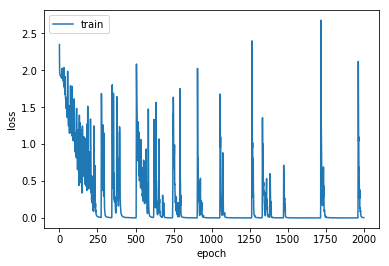

In [7]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [8]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

50/50 [==============================] - 0s 4ms/step
acc: 100.00%


In [9]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타임스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)
    
model.reset_states()
    
print("full song prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
